### Analizando los Salarios en Ciencia de Datos en 2023

Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre los salarios en el campo de la ciencia de datos para el año 2023. Este análisis es crucial para entender las tendencias salariales y los factores que influyen en las diferencias de salarios en esta industria.

In [2]:
import pandas as pd

# Cargar los datos
file_path = '../data/ds_salaries.csv'
df = pd.read_csv(file_path)

# Revisar la estructura de los datos
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### 1. Limpieza de datos con Python:
- Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
- Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.


In [21]:
# Revisar si existen diplicados y removerlos del dataframe
duplicados = df.duplicated().sum()
df_limpio = df.drop_duplicates()

# Ver tipo de datos
data_types = df_limpio.dtypes

duplicados, data_types

(1171,
 work_year              int64
 experience_level      object
 employment_type       object
 job_title             object
 salary                 int64
 salary_currency       object
 salary_in_usd          int64
 employee_residence    object
 remote_ratio           int64
 company_location      object
 company_size          object
 dtype: object)


* Se detectaron y eliminaron 1171 registros duplicados.
* Los tipos de datos fueron verificados y son correctos:
   - Variables categóricas: `object`.
   - Variables numéricas: `int64`.

- Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).
- Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
- Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [29]:
#  Revisar valores unicos en las columnas categoricas para verificar la consistencia
columnas_categoricas = ['experience_level', 'employment_type', 'job_title', 
                       'salary_currency', 'employee_residence', 
                       'company_location', 'company_size']

valores_unicos = {col: df_limpio[col].unique() for col in columnas_categoricas}

valores_unicos

{'experience_level': array(['SE', 'MI', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'FL', 'PT'], dtype=object),
 'job_title': array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
        'Applied Scientist', 'Data Analyst', 'Data Modeler',
        'Research Engineer', 'Analytics Engineer',
        'Business Intelligence Engineer', 'Machine Learning Engineer',
        'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
        'Data Quality Analyst', 'Compliance Data Analyst',
        'Data Architect', 'Applied Machine Learning Engineer',
        'AI Developer', 'Research Scientist', 'Data Analytics Manager',
        'Business Data Analyst', 'Applied Data Scientist',
        'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
        'Head of Data', 'Data Science Manager', 'Data Manager',
        'Machine Learning Researcher', 'Big Data Engineer',
        'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
        'Dire

Los valores de las columnas categoricas son consistentes y no presentan variaciones inusuales. Tampoco hay problemas de mayusculas o errores tipográficos

In [25]:
# Verificar valores faltantes
valores_nulos = df_limpio.isnull().sum()
valores_nulos

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No hay valores faltantes en ninguna columna

In [34]:
# Salario en moneda local
# Detectar valores anomalos
salary_describe = df_limpio['salary'].describe()
# Configurar pandas para mostrar los números sin exponentes y con dos decimales
pd.set_option('display.float_format', '{:.2f}'.format)
salary_describe

count       2584.00
mean      210365.30
std       808037.54
min         6000.00
25%        90000.00
50%       134630.00
75%       182562.50
max     30400000.00
Name: salary, dtype: float64

Al parecer hay un rango demasiado amplio de salarios en moneda local (min      6000.00 y max      30400000.00)

In [33]:
# Salario en usd
salary_usd_describe = df_limpio['salary_in_usd'].describe()

salary_usd_describe

count     2584.00
mean    133409.28
std      67136.84
min       5132.00
25%      84975.00
50%     130000.00
75%     175000.00
max     450000.00
Name: salary_in_usd, dtype: float64

In [43]:
# Obtener estadísticas descriptivas del salario por nivel de experiencia
salary_by_experience_usd = df_limpio.groupby('experience_level')['salary_in_usd'].describe()
print(salary_by_experience_usd)


                   count      mean      std      min       25%       50%  \
experience_level                                                           
EN                270.00  72648.69 51630.63  5409.00  31890.00  61900.00   
EX                 96.00 191078.21 71003.54 15000.00 144211.50 189618.50   
MI                664.00 101828.78 56825.13  5132.00  62486.75  95000.00   
SE               1554.00 153897.44 60450.01  8000.00 112000.00 148800.00   

                       75%       max  
experience_level                      
EN               100000.00 300000.00  
EX               235000.00 416000.00  
MI               134000.00 450000.00  
SE               190150.00 423834.00  


In [44]:
# Obtener estadísticas descriptivas del salario por nivel de experiencia
salary_by_experience = df_limpio.groupby('experience_level')['salary'].describe()
print(salary_by_experience)

                   count      mean        std      min       25%       50%  \
experience_level                                                             
EN                270.00 199203.91  572701.96  6000.00  48000.00  74770.00   
EX                 96.00 252675.34  597015.65 15000.00 145000.00 195150.00   
MI                664.00 276429.33 1432805.38  7500.00  65000.00 100000.00   
SE               1554.00 181462.65  357893.29  8000.00 113900.00 150000.00   

                       75%         max  
experience_level                        
EN               120000.00  6600000.00  
EX               236750.00  6000000.00  
MI               147375.00 30400000.00  
SE               192475.00  7500000.00  



### 2. Exploración de datos con Python


- Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


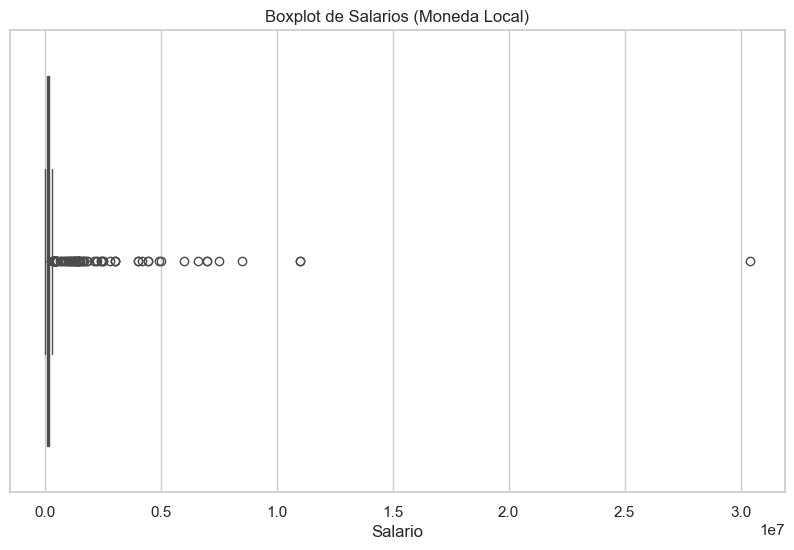

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización exploratoria univariada: Distribucion de salarios en moneda local
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_limpio['salary'])
plt.title('Boxplot de Salarios (Moneda Local)')
plt.xlabel('Salario')
plt.show()

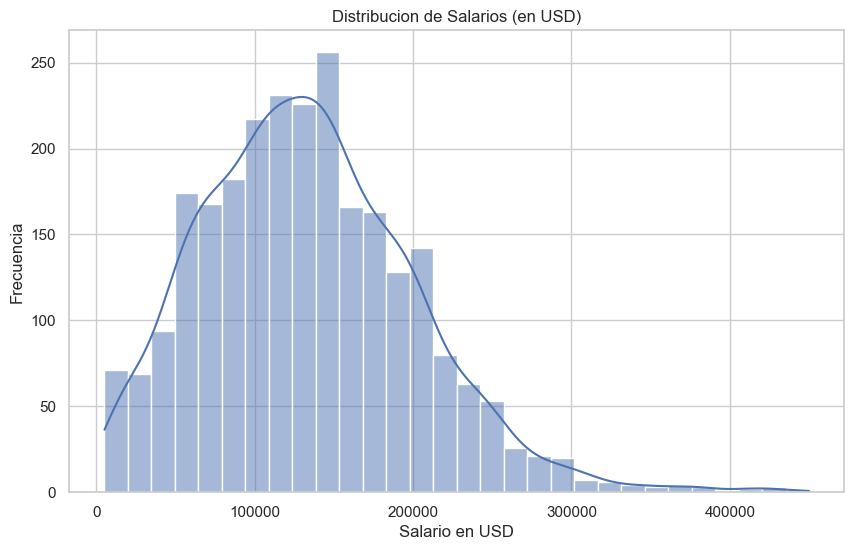

In [38]:


# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Visualización exploratoria univariada: Distribucion de salarios en USD
plt.figure(figsize=(10, 6))
sns.histplot(df_limpio['salary_in_usd'], kde=True, bins=30)
plt.title('Distribucion de Salarios (en USD)')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.show()


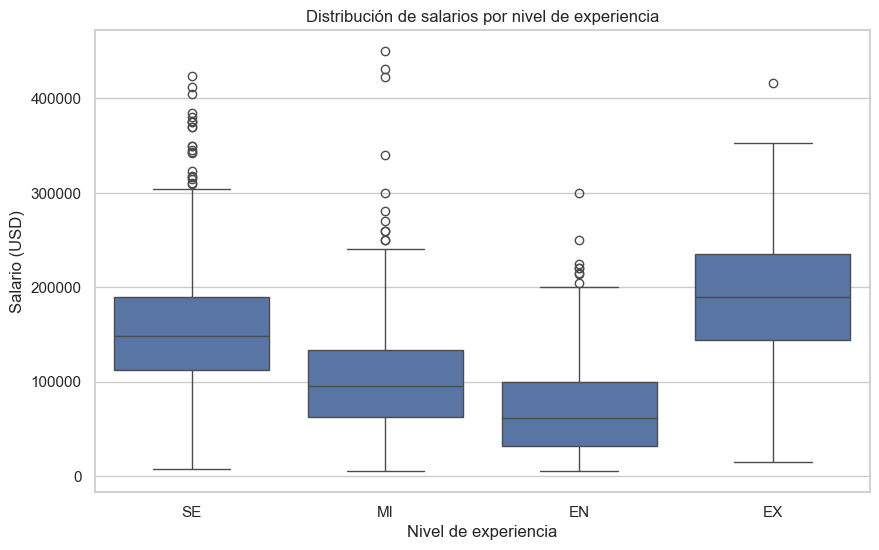

In [40]:
# Crear un boxplot para el salario en función del nivel de experiencia
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_limpio)
plt.title('Distribución de salarios por nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario (USD)')
plt.show()
